#BMI Analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
path = '/content/insurance.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###Target Feature: `bmi`

In [4]:
df.shape

(1338, 7)

In [5]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Target

I want to determine whether male and female has the same BMI or not.

**Null**: There are no *difference* between male and female BMI ($ 𝐻_{0}:\mu_{1}-\mu_{2} = 0 $)

**Alternate**: There are definitely some *differences* ($ 𝐻_{A}:\mu_{1}-\mu_{2} \ne 0 $)

In [7]:
female = df.loc[df.sex=='female']
male = df.loc[df.sex=='male']

In [8]:
female_bmi = female.bmi
male_bmi = male.bmi

###Plotting

<ipython-input-10-31abbf0be64c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_bmi, color= 'pink', hist=False)
<ipython-input-10-31abbf0be64c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_bmi, color= 'blue', hist=False)


<Axes: xlabel='bmi', ylabel='Density'>

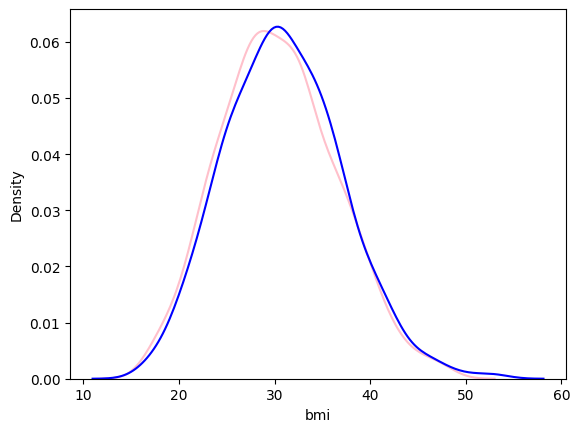

In [10]:
sns.distplot(female_bmi, color= 'pink', hist=False)
sns.distplot(male_bmi, color= 'blue', hist=False)

In [12]:
female.bmi.mean()

30.37774924471299

In [13]:
male.bmi.mean()

30.943128698224854

###T Value & P Value Identification

In [21]:
alpha = 0.05
t_value1, p_value1 = stats.ttest_ind(male_bmi, female_bmi)
print(f"t value is: {t_value1} \n p value is: {p_value1}")

t value is: 1.696752635752224 
 p value is: 0.08997637178984932


##Final Step

In [24]:
if p_value1 < alpha:
  print(f"As p={p_value1} is smaller than alpha={alpha}, I'll reject Null Hypothesis!")
else:
  print(f"As p={p_value1} is bigger than alpha={alpha}, I'll accept Null Hypothesis!")

As p=0.08997637178984932 is bigger than alpha=0.05, I'll accept Null Hypothesis!
